# Notes to discuss with prof

1. since the data is very skewed it won't make sense for us to do cross validation where we randomly choose which data to use for training and which data to use for testing, because if do that after duplicating the low count data then most of the data in testing set will be in training set
2. what is the difference between training the network after performing oversampling and just training the network on the same data but more epochs
3. can we train the model with just 64 examples but keep the positive class data same and randomly choose rest of 32 negative class data?

In [1]:
from mygrad import Layer
from mygrad import Value

In [2]:
import pickle
with open('data.pckl', 'rb') as file:
    data = pickle.load(file)

In [3]:
from sklearn.utils import shuffle
data = shuffle(data)
# data = data[:100]

In [4]:
# get the data

X = [list(number) for number in data['number']]
Y = [label for label in data['label']]

len(X)

1024

In [5]:
X[0]

['0', '1', '1', '1', '0', '1', '0', '0', '0', '0']

In [6]:
for ix in range(len(X)):
    new = []
    for num in X[ix]:
        if num == '0':
            new.extend([1, 0])
        else:
            new.extend([0, 1])
    X[ix] = new


In [7]:
X[0]

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0]

In [8]:
for ix, row in enumerate(X):
    X[ix] = [Value(float(item)) for item in row]


In [9]:
Xtrain, Xtest, Ytrain, Ytest = X[:int(len(X)*0.8)], X[int(len(X)*0.8):], Y[:int(len(X)*0.8)], Y[int(len(X)*0.8):]

In [10]:
list(zip([1, 1, 1], [2, 2, 2, 2, 2, 2]))

[(1, 2), (1, 2), (1, 2)]

In [11]:
# nn.init.zeros_(hiddenLayer.weight)

# s1 = Sigmoid()
hiddenLayer1 = Layer(10, 1, activation='reLu')
outputLayer = Layer(11, 1, activation='sigmoid')
# nn.init.zeros_(outputLayer.weight)

# s2 = Sigmoid()

# parameters = [list(hiddenLayer.parameters())[0]]
# parameters.append(list(outputLayer.parameters())[0])
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()
print(parameters)

[Value(data=-0.00599752784098917), Value(data=0.9678557264249217), Value(data=0.22622183527089934), Value(data=0.044033860742394904), Value(data=-0.7393849603103508), Value(data=0.5473677818243561), Value(data=0.8817632370146684), Value(data=-0.027349925408019393), Value(data=-0.9733807369824516), Value(data=0.7706204208216867), Value(data=-0.20997494731371114), Value(data=-0.22001086789031477), Value(data=-0.6955728344200405), Value(data=-0.1838179364872239), Value(data=-0.409988527389868), Value(data=-0.23944767420816904), Value(data=-0.8169719630165031), Value(data=0.9022154134026581), Value(data=0.4801132443759688), Value(data=0.21849015914373182), Value(data=0.9374155160731177), Value(data=-0.2972941443666468), Value(data=-0.42477612657981956)]


In [12]:
def predict(x):
    x1 = hiddenLayer1(x)
    # out2 = hiddenLayer2(x[5:])
    # out = [out1] + [out2]
    # x = s1(x)
    # print(x)
    
    final = outputLayer([x1] + x)
    # x = s2(x)
    return final

In [13]:
parameters =  outputLayer.parameters() + hiddenLayer1.parameters()


In [14]:
from sklearn.metrics import accuracy_score, precision_score
def getAccuracy(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    count = 0
    for i in range(len(predicted)):
        if predicted[i] == Y[i]:
            count += 1
    return count/len(predicted)
def getPrecisiont(X, Y):
    predicted = [1 if predict(x).data > 0.5 else 0 for x in X ]
    return precision_score(Y, predicted)



In [15]:
getAccuracy(Xtest, Ytest)

0.3951219512195122

In [16]:
losss = []
prevchange = [0]*len(parameters)
beta = 0.7

In [17]:
lr = 1
epochs = 1000

for _ in range(epochs):
    Y_pred = [predict(x) for x in Xtrain]
    # print(Y_pred)
    loss = Value(0)
    for i in range(len(Ytrain)):
        if Ytrain[i] == 1:
            # print('ssd')
            loss -= Y_pred[i].log()
        else:
            # print('sds')
            loss -= (Value(1) - Y_pred[i]).log()
    loss = loss/len(X)
    loss.backward()

    for ix, p in enumerate(parameters):
        # print(p.grad)
        change = lr*p.grad
        p.data = p.data -change
        prevchange[ix] = change

    for p in parameters:
        p.grad = 0
    losss.append(loss.data)
    print(loss, _)
print( 'test', getAccuracy(Xtest, Ytest),'train', getAccuracy(Xtrain, Ytrain))

Value(data=0.7476968614968531) 0
Value(data=0.6640140186195373) 1
Value(data=0.6233726154464679) 2
Value(data=0.5936741297744094) 3
Value(data=0.5688485880167172) 4
Value(data=0.5477171658945961) 5
Value(data=0.5297511974864384) 6
Value(data=0.5145075002595558) 7
Value(data=0.5015799493891965) 8
Value(data=0.4906049039841296) 9
Value(data=0.481265742149835) 10
Value(data=0.47329262695223906) 11
Value(data=0.46645904365430524) 12
Value(data=0.4605767400691596) 13
Value(data=0.45549020710965094) 14
Value(data=0.45107137155763133) 15
Value(data=0.4472148354628401) 16
Value(data=0.44383378253171557) 17
Value(data=0.4408565510033776) 18
Value(data=0.4382238130645928) 19
Value(data=0.43588627806499713) 20
Value(data=0.43380283393044444) 21
Value(data=0.4319390479461346) 22
Value(data=0.4302659586255408) 23
Value(data=0.42875910159916175) 24
Value(data=0.42739772287524797) 25
Value(data=0.42616414186343854) 26
Value(data=0.42504323409469963) 27
Value(data=0.4240220097170802) 28
Value(data=0.4

In [110]:
getPrecisiont(Xtest, Ytest)

0.9026548672566371

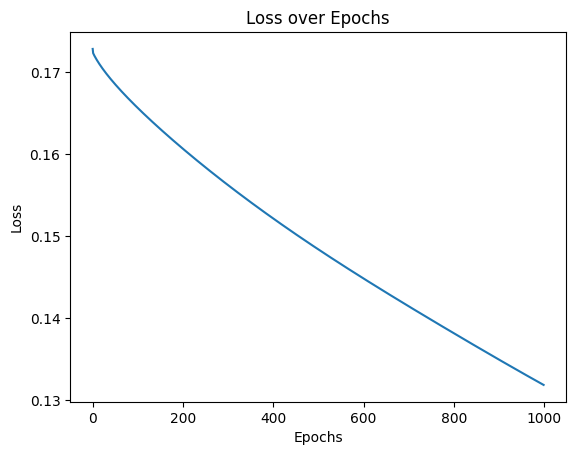

In [34]:
import matplotlib.pyplot as plt

plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


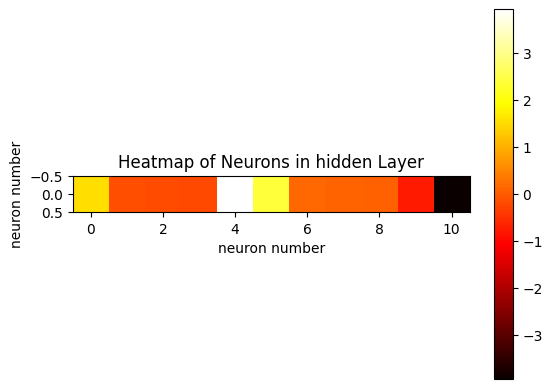

Text(0, 0.5, 'neuron number')

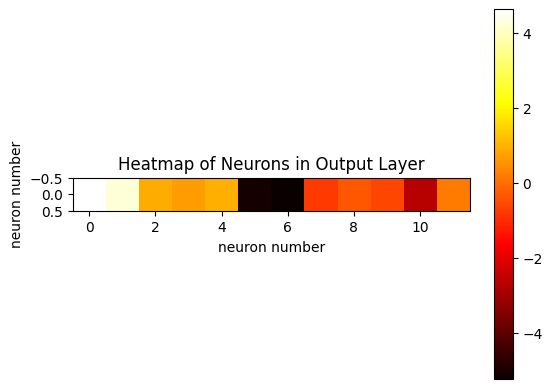

In [33]:
neuron1weightsbias = [v.data for v in hiddenLayer1.neurons[0].w] + [hiddenLayer1.neurons[0].b.data]
outputneuronweightsbias = [v.data for v in outputLayer.neurons[0].w] + [outputLayer.neurons[0].b.data]
import matplotlib.pyplot as plt

plt.imshow([neuron1weightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in hidden Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')
plt.show()

plt.imshow([outputneuronweightsbias], cmap='hot')
plt.colorbar()
plt.title('Heatmap of Neurons in Output Layer')
plt.xlabel('neuron number')
plt.ylabel('neuron number')


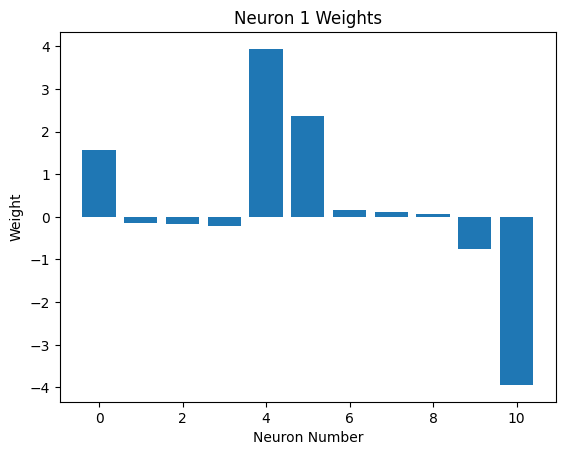

In [34]:
plt.bar(range(len(neuron1weightsbias)), neuron1weightsbias)
plt.xlabel('Neuron Number')
plt.ylabel('Weight')
plt.title('Neuron 1 Weights')
plt.show()


In [35]:
import pickle as pkl 

with open('parameters/neuron1weightsbias5.pckl', 'wb') as file:
    pkl.dump(neuron1weightsbias, file)
with open('parameters/outputneuronweightsbias5.pckl', 'wb') as file:
    pkl.dump(outputneuronweightsbias, file)

In [36]:
# Load model

def loadModel():
    neuron1weightsbias, outputneuronweightsbias = [], []
    with open(f'parameters/neuron1weightsbias2.pckl', 'rb') as file:
        neuron1weightsbias = pickle.load(file)
    with open('parameters/outputneuronweightsbias2.pckl', 'rb') as file:
        outputneuronweightsbias = pickle.load(file)
    hiddenLayer1_ = Layer(10, 1)
    outputLayer_ = Layer(11, 1)

    hiddenLayer1_.neurons[0].w = [Value(i) for i in neuron1weightsbias[:-1]]
    hiddenLayer1_.neurons[0].b = Value(neuron1weightsbias[-1])

    outputLayer_.neurons[0].w = [Value(i) for i in outputneuronweightsbias[:-1]]
    outputLayer_.neurons[0].b = Value(outputneuronweightsbias[-1])
    return hiddenLayer1_, outputLayer_, neuron1weightsbias, outputneuronweightsbias

In [37]:
import pickle as pkl 

hiddenLayer1, outputLayer, neuron1weightsbias, outputneuronweightsbias = loadModel()

In [38]:
getAccuracy(Xtest, Ytest)

0.9560975609756097

In [39]:
[round(i)for i in neuron1weightsbias]

[0, 2, 8, 6, -4, 4, -6, -8, -2, 0, -3]

In [ ]:
"""
0110011110
0001000100
0101110110
0110101000
0000110010
1000000100
0100010100
0010111010
"""

In [47]:
x = [int(i) for i in '0101110110']
act= sum([x[i]*neuron1weightsbias[i] for i in range(10)])-3

In [49]:
import math
sig = 1/(1+math.exp(-act))
sig

0.011155589025044415

In [53]:
t = outputneuronweightsbias[0]*sig
t

-0.15881196450303459

In [56]:
[outputneuronweightsbias[i+1]*x[i] for i in range(10)]

[0.0,
 1.1734301638760558,
 0.0,
 4.08848393551656,
 -1.9482578952061107,
 2.6185877829911504,
 -0.0,
 -5.035839419412727,
 -1.002084938769422,
 -0.0]

In [41]:
predict([0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

Value(data=0.7442715509156452)

In [40]:
[round(i)for i in outputneuronweightsbias]

[-14, 5, 1, 6, 4, -2, 3, -4, -5, -1, -3, 1]

In [130]:
import math
class check:
    def __init__(self, w1, w2, w3, w4, w5, t1, t2):
        self.w1 = w1
        self.w2 = w2
        self.w3 = w3
        self.w4 = w4
        self.w5 = w5
        self.t1 = t1
        self.t2 = t2

    def ok(self, x1, x2):
        act = self.w1*x1 +self.w2*x2 +self.t1
        sigact = 1/(1+math.exp(-act))
        out = self.w5*sigact -self.w3*x1 + self.w4*x2 -self.t2
        out = 1/(1+math.exp(-out))
        return act
ps = []
for i in range(5):
    ps.append(check(neuron1weightsbias[i],
                    neuron1weightsbias[9-i],
                    outputneuronweightsbias[i+1],
                    outputneuronweightsbias[10-i],
                    outputneuronweightsbias[0],
                    neuron1weightsbias[-1],
                    outputneuronweightsbias[-1]))

'0110011110\n0001000100\n0101110110\n0110101000\n0000110010\n1000000100\n0100010100\n0010111010\n'

In [185]:
print(ps[0].ok(x[0],x[-1]))
print(ps[1].ok(x[1],x[-2]))
print(ps[2].ok(x[2],x[-3]))
print(ps[3].ok(x[3],x[-4]))
print(ps[4].ok(x[4],x[-5]))


-2.9570791492469928
-3.0185698068739386
-2.9570791492469928
-2.9570791492469928
-2.7082131990310354


In [186]:
outmid = ps[0].ok(x[0],x[-1]) + ps[1].ok(x[1],x[-2]) + ps[2].ok(x[2],x[-3]) + ps[3].ok(x[3],x[-4]) + ps[4].ok(x[4],x[-5])
outmid

-14.598020453645955

In [ ]:
"""
0110011110
0001000100
0101110110
0110101000
0000110010
1000000100
0100010100
0010111010
"""

In [210]:
x = [0, 1, 0, 0, 1, 1, 0, 0, 1, 0]
inmid = [neuron1weightsbias[i]*x[i] + neuron1weightsbias[9-i]*x[9-i] for i in range(5)]
print(inmid, 'input')
outmid = sum(inmid) + neuron1weightsbias[-1]
print(outmid, 'hidden layer activation')
sigmid = 1/(1+math.exp(-outmid))
print(sigmid, 'hidenlayer out')
inres = [outputneuronweightsbias[i+1]*x[i] + outputneuronweightsbias[10-i]*x[9-i] for i in range(5)]
print(inres, 'residual weights')
print(outputneuronweightsbias[-1], 'sigmidweight')
outres = sum(inres)+outputneuronweightsbias[-1]
print(outres, 'outres')
print(outputneuronweightsbias[-1], 'outputbias')
print(outres + sigmid*outputneuronweightsbias[0])

[0.0, -0.06149065762694583, 0.0, 0.0, 0.24886595021595737] input
-2.7697038566579812 hidden layer activation
0.05898344857709712 hidenlayer out
[0.0, 0.17134522510663386, 0.0, 0.0, 0.6703298877850397] residual weights
1.4537179676184557 sigmidweight
2.295393080510129 outres
1.4537179676184557 outputbias
1.4556994237553957


In [206]:
[round(i) for i in neuron1weightsbias]

[0, 2, 8, 6, -4, 4, -6, -8, -2, 0, -3]

In [207]:
[round(i) for i in outputneuronweightsbias]

[-14, 5, 1, 6, 4, -2, 3, -4, -5, -1, -3, 1]

0.05898344857709712

[0.0, 0.17134522510663386, 0.0, 0.0, 0.6703298877850397]

1.4537179676184557

2.295393080510129

-14.236089564298222

1.4556994237553957

In [106]:
wrongX = []
wrongY = []
wrongpred = []
rightX = []
for i in range(len(Xtest)):
    if (1 if predict(Xtest[i]).data > 0.5 else 0) != Ytest[i]:
        wrongX.append(Xtest[i])
        wrongY.append(Ytest[i])
        wrongpred.append(predict(Xtest[i]))
    else:
        if Ytest[i] != 1:
            rightX.append(Xtest[i])

In [107]:
for ix, x in enumerate(wrongX):
    print(''.join([str(int(i.data)) for i in x]))

0110011110
0001000100
0101110110
0110101000
0000110010
1000000100
0100010100
0010111010
0011111110
0010110110
0111101100


In [122]:
for x in rightX[:5]:
    print(''.join([str(int(i.data)) for i in x]))

0100100111
0010100101
0010111011
0000011100
0110001011


In [123]:
p.ok(0, 0)
p.ok(0, 1)
p.ok(1, 0)
p.ok(1, 1)

-2.7082131990310354